In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Machine Learning algorithm
from sklearn.linear_model import LinearRegression

# For splitting dataset
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    

%matplotlib inline

In [3]:
# Loading the data
train  = pd.read_csv("cab_fare.csv",na_values={"pickup_datetime":"43"})
test   = pd.read_csv("test_cab_fare.csv")

In [4]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [7]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  

In [10]:
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [11]:
train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [12]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
Year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [13]:
train.dropna(subset=["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00,-74.008820,40.718757,-73.998865,40.719987,1.0,2014.0,12.0,12.0,4.0,7.0,41.0
16063,16.1,2009-07-13 07:58:00,-73.981310,40.781695,-74.014392,40.715527,2.0,2009.0,7.0,13.0,0.0,7.0,58.0
16064,8.5,2009-11-11 11:19:07,-73.972507,40.753417,-73.979577,40.765495,1.0,2009.0,11.0,11.0,2.0,11.0,19.0
16065,8.1,2010-05-11 23:53:00,-73.957027,40.765945,-73.981983,40.779560,1.0,2010.0,5.0,11.0,1.0,23.0,53.0


In [14]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
Year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [15]:
test["pickup_datetime"]=pd.to_datetime(test["pickup_datetime"],format="%Y-%m-%d %H:%M:%S UTC")

In [16]:
test['Year']=test['pickup_datetime'].dt.year
test['Month']=test['pickup_datetime'].dt.month
test['Date']=test['pickup_datetime'].dt.day
test['Day']=test['pickup_datetime'].dt.dayofweek
test['Hour']=test['pickup_datetime'].dt.hour
test['Minute']=test['pickup_datetime'].dt.minute

In [17]:
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [18]:
train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [19]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [20]:
train.drop("passenger_count", axis=1, inplace=True)
test.drop("passenger_count", axis=1, inplace=True)


In [21]:
train.shape

(16046, 12)

In [22]:
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 16046, dtype: float64

In [23]:
Counter(train["fare_amount"]<0)

Counter({False: 16043, True: 3})

In [24]:
# Remove those fields which has -ve values
train=train.drop(train[train['fare_amount']<0].index, axis=0)
print(train.shape)

(16043, 12)


In [25]:
# Make sure there is no negative values in the fare_amount variable column
train["fare_amount"].min()

0.0

In [26]:
# Remove the row where fare amount is zero
train=train.drop(train[train['fare_amount']<1].index,axis=0)
train.shape

(16041, 12)

In [27]:
train=train.drop(train[train["fare_amount"].isnull()].index, axis=0)
train.shape

(16017, 12)

In [28]:
train=train.drop(train[train["fare_amount"]>453].index, axis=0)
train.shape

(16015, 12)

In [29]:
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,2011.0,7.0,30.0,5.0,11.0,15.0


In [30]:
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [31]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Year,Month,Date,Day,Hour,Minute


In [32]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [33]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [34]:
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))

    # Radius of earth in kilometers is 6371
    km = 6371* c
    miles = 0.62 * km
    return miles

In [35]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [36]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [37]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,2009.0,6.0,15.0,0.0,17.0,26.0,0.639074
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,2010.0,1.0,5.0,1.0,16.0,52.0,5.239083
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2011.0,8.0,18.0,3.0,0.0,35.0,0.861506
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,2012.0,4.0,21.0,5.0,4.0,30.0,1.735548
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,2010.0,3.0,9.0,1.0,7.0,51.0,1.239477


In [38]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,2015,1,27,1,13,8,1.440421
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,2015,1,27,1,13,8,1.503719
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,2011,10,8,5,11,53,0.383549
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,2012,12,1,5,21,12,1.215840
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,2012,12,1,5,21,12,3.340127


In [39]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Year,Month,Date,Day,Hour,Minute,distance
count,16014.000000,16014.000000,16014.000000,16014.000000,16014.000000,16014.000000,16014.000000,16014.000000,16014.000000,16014.000000,16014.000000,16014.000000
mean,11.366641,-72.476256,39.899643,-72.475813,39.905272,2011.730548,6.261396,15.667291,3.033158,13.500624,29.656988,9.962556
std,10.794538,10.533458,6.181440,10.530114,6.164969,1.863618,3.448145,8.684407,1.968645,6.517349,17.297372,201.711099
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992157,40.734943,-73.991182,40.734754,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000,0.753862
50%,8.500000,-73.981707,40.752620,-73.980184,40.753585,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000,1.318322
75%,12.500000,-73.966843,40.767381,-73.963646,40.768028,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000,2.389651
max,453.000000,40.766125,41.366138,40.802437,41.366138,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000,5373.876104


In [40]:
Counter(train['distance'] == 0)

Counter({False: 15559, True: 455})

In [41]:
Counter(test['distance']==0)

Counter({False: 9829, True: 85})

In [42]:
train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15559, 13)

In [43]:
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(15534, 13)

In [44]:
drop1 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

train = train.drop(drop1, axis = 1)

In [45]:
train.head()

,fare_amount,Year,Month,Date,Day,Hour,distance
0,4.5,2009.0,6.0,15.0,0.0,17.0,0.639074
1,16.9,2010.0,1.0,5.0,1.0,16.0,5.239083
2,5.7,2011.0,8.0,18.0,3.0,0.0,0.861506
3,7.7,2012.0,4.0,21.0,5.0,4.0,1.735548
4,5.3,2010.0,3.0,9.0,1.0,7.0,1.239477


In [46]:
train['Year'] = train['Year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [47]:
train.dtypes

fare_amount    float64
Year             int64
Month            int64
Date             int64
Day              int64
Hour             int64
distance       float64
dtype: object

In [48]:
drop2 = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

test = test.drop(drop2, axis = 1)

In [49]:
test.head()

,Year,Month,Date,Day,Hour,distance
0,2015,1,27,1,13,1.440421
1,2015,1,27,1,13,1.503719
2,2011,10,8,5,11,0.383549
3,2012,12,1,5,21,1.215840
4,2012,12,1,5,21,3.340127


In [50]:
test['Year'] = test['Year'].astype('int64')
test['Month'] = test['Month'].astype('int64')
test['Date'] = test['Date'].astype('int64')
test['Day'] = test['Day'].astype('int64')
test['Hour'] = test['Hour'].astype('int64')

In [51]:
test.dtypes

Year          int64
Month         int64
Date          int64
Day           int64
Hour          int64
distance    float64
dtype: object

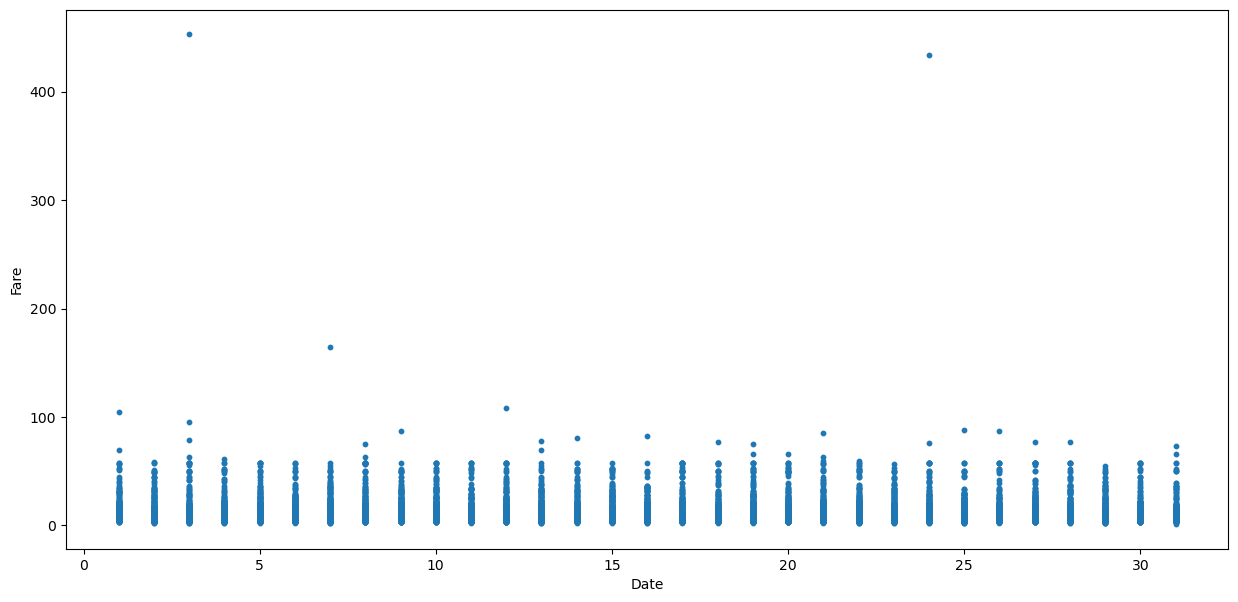

In [52]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

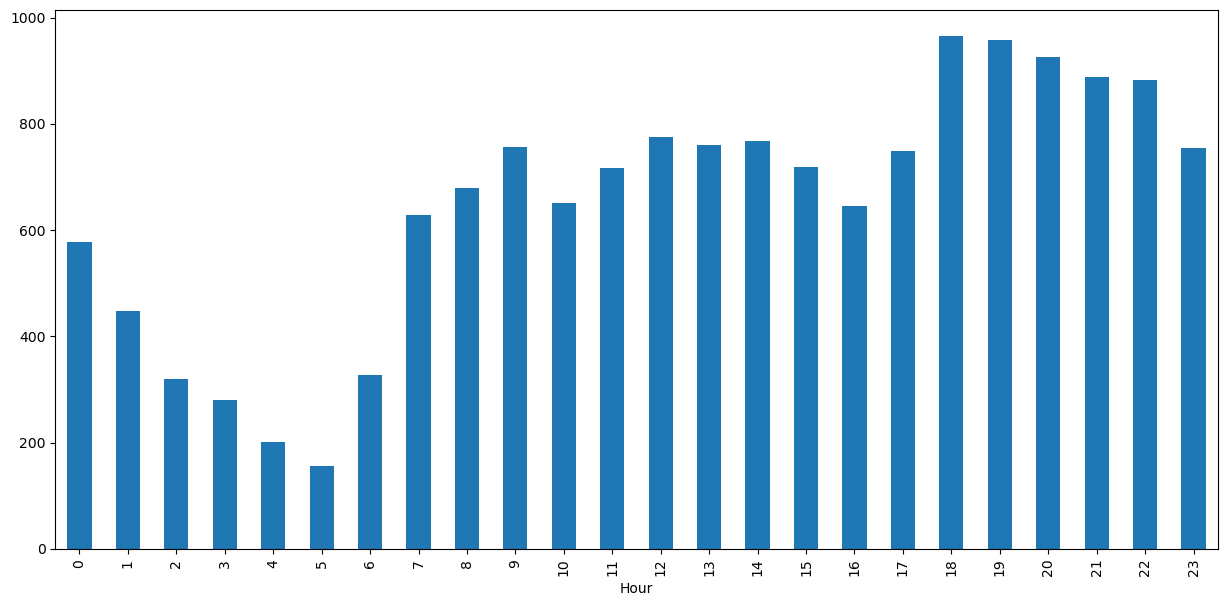

In [53]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

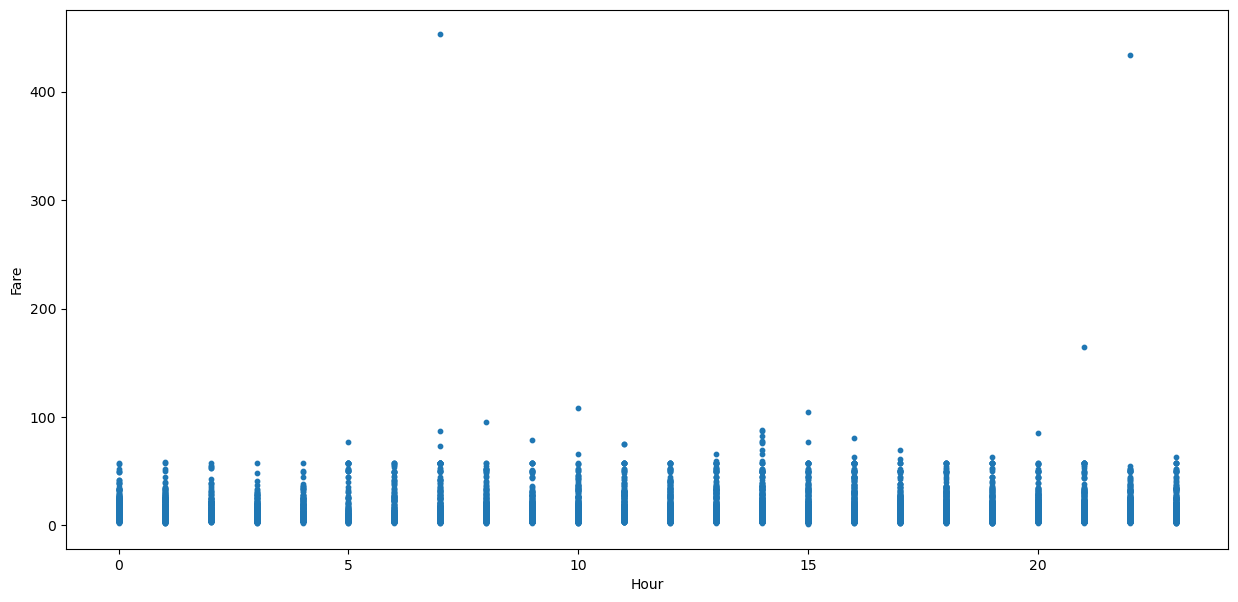

In [54]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

<AxesSubplot:xlabel='Day', ylabel='count'>

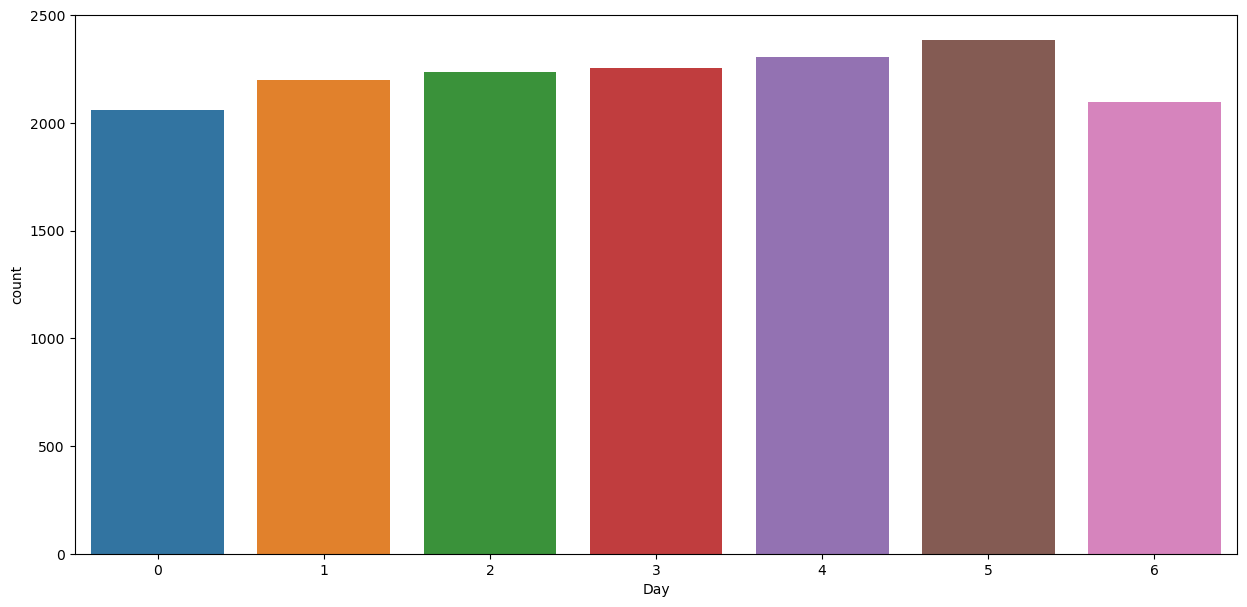

In [55]:
# Impact of Day on the number of cab rides

plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

fare_amount


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


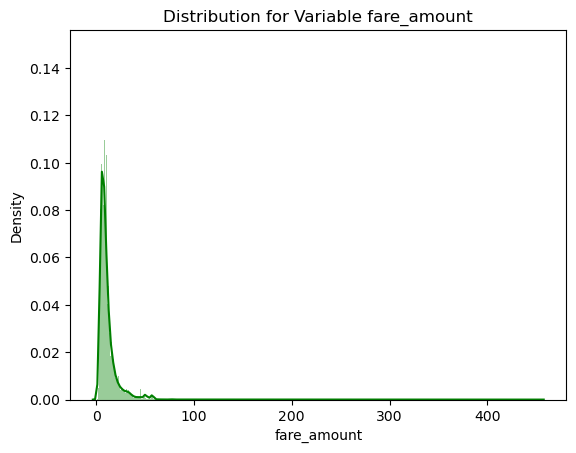

distance


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


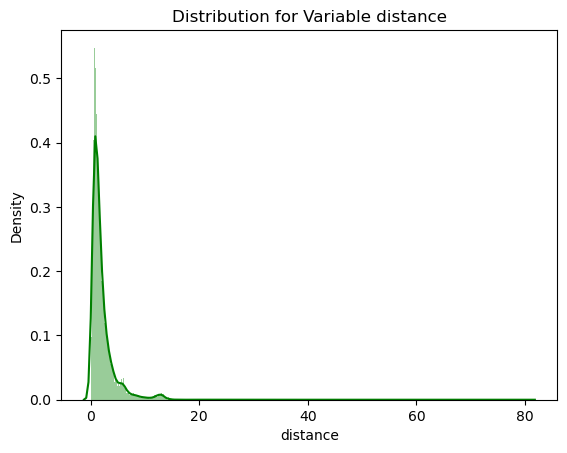

In [56]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [57]:
# Since skewness of target variable(fare_amount) is high, apply log transform to reduce the skewness

train['fare_amount'] = np.log1p(train['fare_amount'])

In [58]:
# Since skewness of distance variable is high, apply log transform to reduce the skewness

train['distance'] = np.log1p(train['distance'])

fare_amount


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


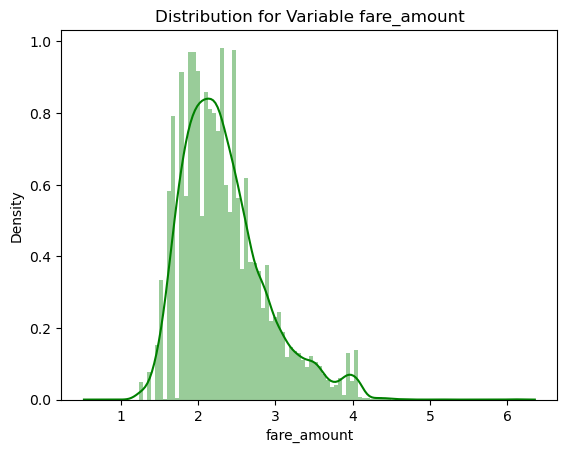

distance


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


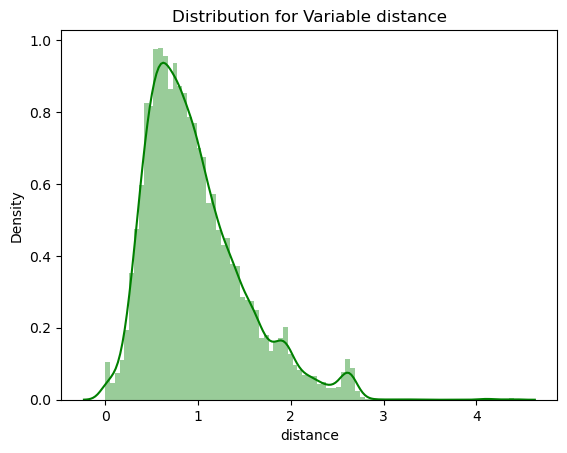

In [59]:
# Normality to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

OBSERVATIONS

Here, we can see bell shaped distribution.
Hence our continous variables are now normally distributed, we will use not use any Feature Scalling technique i.e, Normalization or Standarization for our training data.

In [60]:
test['distance'] = np.log1p(test['distance'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


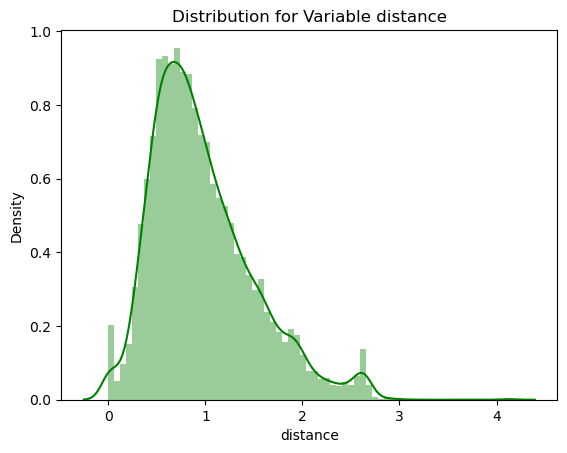

In [61]:
# Rechecking the distribution for distance

sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [62]:
test1= test.copy()

In [63]:
x_train, x_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [64]:
print(x_train.shape)
print(x_test.shape)

(12427, 6)
(3107, 6)


In [65]:
x_train

,Year,Month,Date,Day,Hour,distance
14759,2013,11,28,3,11,1.947746
1821,2014,7,17,3,19,0.491121
11398,2015,4,17,4,11,0.448109
5692,2012,9,1,5,20,0.340725
5599,2012,8,25,5,15,0.968643
...,...,...,...,...,...,...
955,2014,9,26,4,18,0.793676
5388,2010,10,6,2,22,0.948075
12580,2013,4,23,1,9,0.779549
248,2014,9,13,5,12,0.834064


In [66]:
# Building model on top of training dataset

model = LinearRegression().fit(x_train , y_train)

In [67]:
# Prediction on train data

pred_train_LR = model.predict(x_train)

In [68]:
# Prediction on test data

pred_test_LR= model.predict(x_test)

In [69]:
# RMSE for train data

RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [70]:
RMSE_test_LR= np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [71]:
print("Root Mean Squared Error for Train data = "+str(RMSE_train_LR))
print("Root Mean Squared Error for Test data = "+str(RMSE_test_LR))

Root Mean Squared Error for Train data = 0.2666795955951613
Root Mean Squared Error for Test data = 0.26815493264783913


In [72]:
# Calculate R_square for train data

from sklearn.metrics import r2_score

r2_score(y_train, pred_train_LR)

0.7635882225886207

In [73]:
r2_score(y_test, pred_test_LR)

0.7448977432429253

In [74]:
x_train.columns

Index(['Year', 'Month', 'Date', 'Day', 'Hour', 'distance'], dtype='object')

In [75]:
# New single-row input for testing
new_input = pd.DataFrame({'Year': [2020], 'Month': [8], 'Date': [12], 'Day':[3], 'Hours':[12],'distance':[200]})

# Preprocess the new input data (ensure consistency with preprocessing during training)
# ...

# Make predictions
prediction = model.predict(new_input)

print("Predicted value:", prediction[0])

Predicted value: 178.859094395802


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Hours
Feature names seen at fit time, yet now missing:
- Hour

  warnings.warn(message, FutureWarning)


In [76]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'trained_model.joblib')


['trained_model.joblib']

In [80]:
import pickle

with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [79]:
new_input

,Year,Month,Date,Day,Hours,distance
0,2020,8,12,3,12,200
